In [2]:
from tensorflow.keras import Sequential,datasets
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt



#Load Dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes.

In [18]:
(x_train, y_train),(x_test, y_test)=datasets.cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

#Reshape

In [6]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
y_classes =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
len(y_classes)

10

#observe dataset

In [9]:
def showimage(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(y_classes[y[index]])

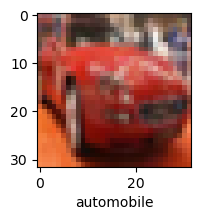

In [10]:
showimage(x_train,y_train, 5)

##Normalize the data

In [11]:
x_train[0]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

##model building
The  below  code define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.
In this example, we will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. we can do this by passing the argument input_shape to your first layer.


In [14]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))



###Add Dense layers 
To complete the model, feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so we use a final Dense layer with 10 outputs.

In [15]:
model.add(layers.Flatten()) # it converts 2D to 1D
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

### Compile the model

In [16]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )



In [17]:
model.fit(x_train, y_train, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(x_test,y_test)
test_acc

Epoch 1/10
782/782 [==============================] - 42s 51ms/step - loss: 1.5895 - accuracy: 0.4167
Epoch 2/10
782/782 [==============================] - 40s 51ms/step - loss: 1.2234 - accuracy: 0.5646
Epoch 3/10
782/782 [==============================] - 39s 50ms/step - loss: 1.0798 - accuracy: 0.6208
Epoch 4/10
782/782 [==============================] - 39s 50ms/step - loss: 0.9872 - accuracy: 0.6542
Epoch 5/10
782/782 [==============================] - 41s 52ms/step - loss: 0.9098 - accuracy: 0.6810
Epoch 6/10
782/782 [==============================] - 48s 62ms/step - loss: 0.8398 - accuracy: 0.7045
Epoch 7/10
782/782 [==============================] - 42s 53ms/step - loss: 0.7904 - accuracy: 0.7228
Epoch 8/10
782/782 [==============================] - 40s 51ms/step - loss: 0.7442 - accuracy: 0.7377
Epoch 9/10
782/782 [==============================] - 44s 56ms/step - loss: 0.7026 - accuracy: 0.7551
Epoch 10/10
313/313 [==============================] - 4s 12ms/step - loss: 0.8548

0.7110999822616577